In [136]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# Reading data into Python environment
df=pd.read_csv('Weather_Data.csv')
df

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0


<AxesSubplot:>

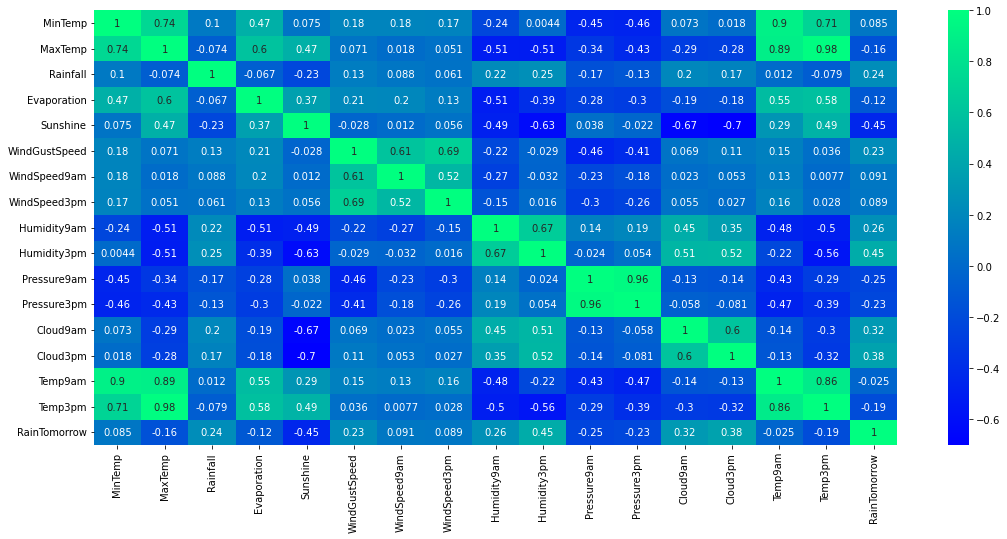

In [138]:
# Correlation Matrix
corr_matrix=df.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

Highly positive correlated : MinTemp and MaxTemp , MinTemp and Temp9am , MinTemp and Temp3pm MaxTemp and Temp9am , MaxTemp and Temp3pm , Pressure9am and Pressure 3pm, Temp9am and Temp 3pm

Negatively correlated : Sunshine and Cloud9am , Sunshine and Cloud3pm

The columns MaxTemp,Evaporation,Sunshine,Pressure9am,Pressure3pm,Temp9am and Temp3pm have less negative correlation with the Target variable,'RainTomorrow'.

In [139]:
# Dropping the unnecessary features
df1=df.drop(['row ID','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Cloud9am','Cloud3pm','Temp9am','Temp3pm'],axis=1)

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99073 non-null  float64
 2   MaxTemp        99286 non-null  float64
 3   WindGustDir    92995 non-null  object 
 4   WindGustSpeed  93036 non-null  float64
 5   WindDir9am     92510 non-null  object 
 6   WindDir3pm     96868 non-null  object 
 7   Humidity3pm    97010 non-null  float64
 8   Pressure3pm    89780 non-null  float64
 9   RainToday      98537 non-null  object 
 10  RainTomorrow   99516 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 8.4+ MB


In [141]:
df1.isna().sum()

Location            0
MinTemp           443
MaxTemp           230
WindGustDir      6521
WindGustSpeed    6480
WindDir9am       7006
WindDir3pm       2648
Humidity3pm      2506
Pressure3pm      9736
RainToday         979
RainTomorrow        0
dtype: int64

<AxesSubplot:>

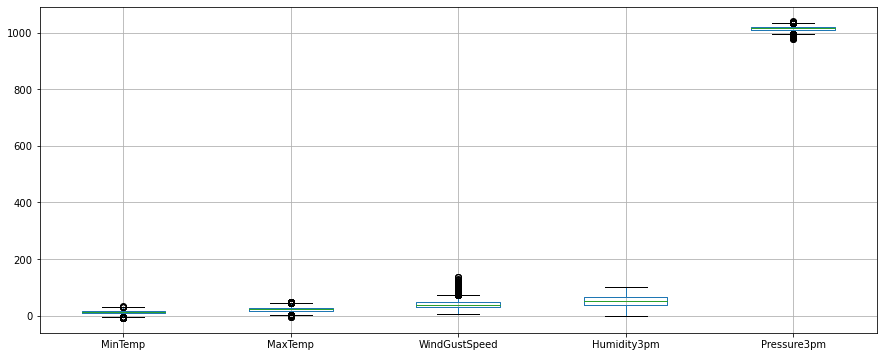

In [142]:
df1.boxplot(column=['MinTemp','MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'],figsize=(15,6))

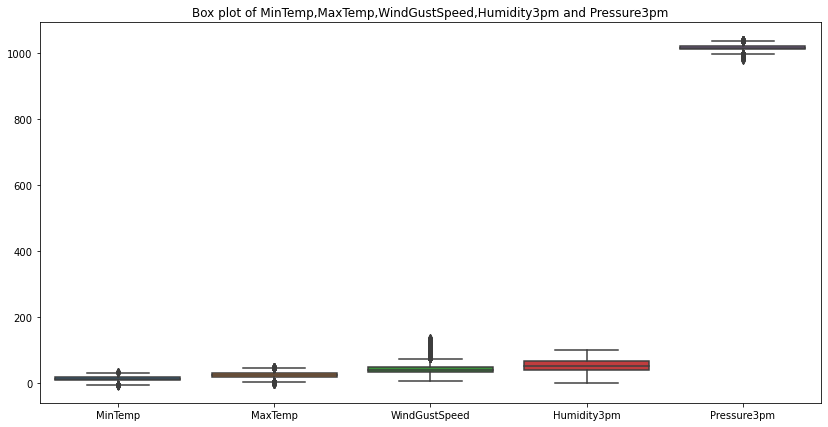

In [143]:
# Box plot
plt.rcParams['figure.figsize']=14,7
sns.boxplot(data=df1[['MinTemp','MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm']])
plt.title('Box plot of MinTemp,MaxTemp,WindGustSpeed,Humidity3pm and Pressure3pm')
plt.show()

In [144]:
# Filling the missing values with median
df1['MinTemp']=df1['MinTemp'].fillna(df1['MinTemp'].median())
df1['MaxTemp']=df1['MaxTemp'].fillna(df1['MaxTemp'].median())
df1['WindGustSpeed']=df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].median())
df1['Pressure3pm']=df1['Pressure3pm'].fillna(df1['Pressure3pm'].median())

In [145]:
# Filling missing values in Humidity3pm' with mean
df1['Humidity3pm']=df1['Humidity3pm'].fillna(df1['Humidity3pm'].mean())

In [146]:
df1.isna().sum()

Location            0
MinTemp             0
MaxTemp             0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
Humidity3pm         0
Pressure3pm         0
RainToday         979
RainTomorrow        0
dtype: int64

In [147]:
df1['WindGustDir'].mode()

0    W
Name: WindGustDir, dtype: object

In [148]:
df1['WindDir3pm'].mode()

0    SE
Name: WindDir3pm, dtype: object

In [149]:
df1['WindDir9am'].mode()

0    N
Name: WindDir9am, dtype: object

In [150]:
# Filling missing values with mode
df1['WindGustDir']=df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0])
df1['WindDir3pm']=df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0])
df1['WindDir9am']=df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0])

In [151]:
# When we fill the missing values in RainToday with mode, this might mislead our model.Hence
# dropping these rows
df1=df1.dropna(subset=['RainToday'])

In [152]:
df1=df1.reset_index(drop=True)

In [153]:
df1.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64

In [154]:
# In the column Humidity3pm, there is 0% Humidity. That is impossible
df1[df1['Humidity3pm']==0]

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
72569,Woomera,19.4,40.0,NNW,61.0,N,N,0.0,1007.6,No,0
72843,Woomera,23.4,41.6,SSW,69.0,NNE,NNW,0.0,1006.5,No,0
73060,Woomera,17.3,37.1,NNW,70.0,N,NNW,0.0,1016.6,No,0
73068,Woomera,17.7,38.1,N,50.0,N,NNW,0.0,1013.5,No,0


In [155]:
# Replacing 0% Humidity with 1%
df1['Humidity3pm']=df1['Humidity3pm'].replace(0,1)

In [ ]:
# Handling outliers

In [156]:
# Finding interquartile range,detecting the outliers and handling them
features_with_outliers=['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm']
for feature in features_with_outliers:
    Q1=np.percentile(df1[feature],25)
    Q3=np.percentile(df1[feature],75)
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    df1[feature]=np.where(df1[feature]<low_lim,low_lim,np.where(df1[feature]>up_lim,up_lim,df1[feature]))

<AxesSubplot:>

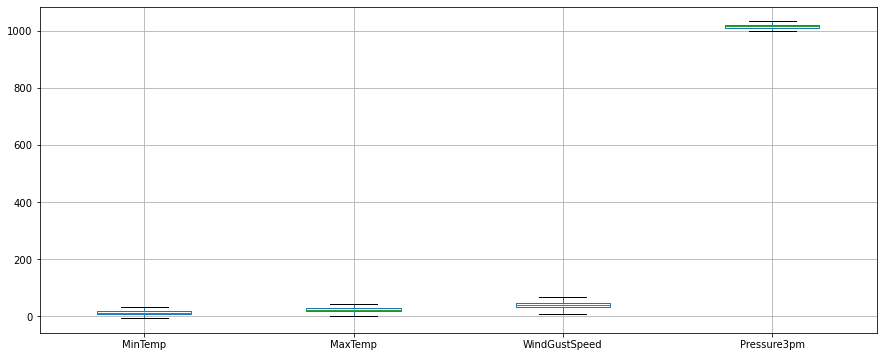

In [157]:
df1.boxplot(column=['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm'],figsize=(15,6))

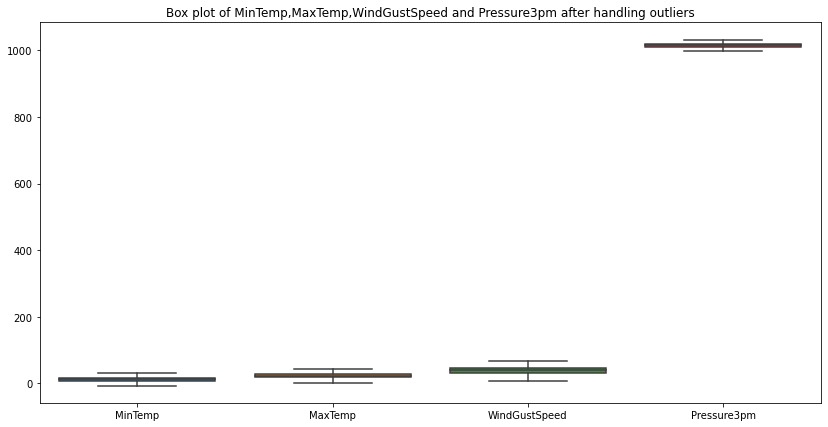

In [24]:
# Box plot after handling outliers
plt.rcParams['figure.figsize']=14,7
sns.boxplot(data=df1[['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm']])
plt.title('Box plot of MinTemp,MaxTemp,WindGustSpeed and Pressure3pm after handling outliers')
plt.show()

In [158]:
# Label Encoding Location,WindDir3pm,WindGustDir and RainToday
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df1['Location']=lab_enc.fit_transform(df1['Location'])
df1['WindDir3pm']=lab_enc.fit_transform(df1['WindDir3pm'])
df1['WindDir9am']=lab_enc.fit_transform(df1['WindDir9am'])
df1['WindGustDir']=lab_enc.fit_transform(df1['WindGustDir'])
df1['RainToday']=lab_enc.fit_transform(df1['RainToday'])

In [159]:
df1

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,13.4,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,7.4,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,17.5,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,14.6,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,7.7,26.7,13,35.0,10,13,19.0,1010.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
98532,41,8.0,20.7,2,41.0,9,0,32.0,1024.3,0,0
98533,41,3.5,21.8,0,31.0,2,0,27.0,1021.2,0,0
98534,41,2.8,23.4,0,31.0,9,1,24.0,1020.3,0,0
98535,41,3.6,25.3,6,22.0,9,3,21.0,1019.1,0,0


<AxesSubplot:>

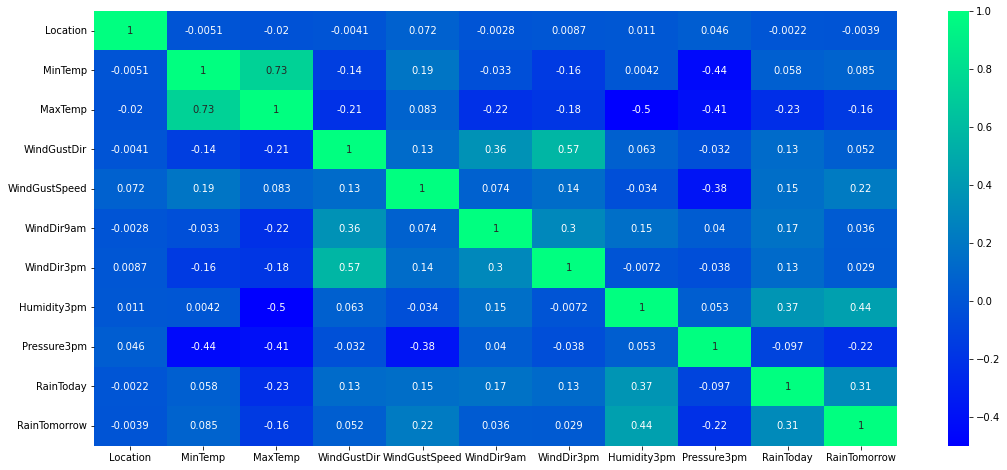

In [160]:
# Correlation Matrix after Label Encoding
corr_matrix=df1.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

In [161]:
df1['AvgTemp']=df1[['MinTemp','MaxTemp']].mean(axis=1)

In [162]:
df1.drop(['MinTemp','MaxTemp'],axis=1,inplace=True)

In [163]:
df1

,Location,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,AvgTemp
0,2,13,44.0,13,14,22.0,1007.1,0,0,18.15
1,2,14,44.0,6,15,25.0,1007.8,0,0,16.25
2,2,13,41.0,1,7,33.0,1006.0,0,0,24.90
3,2,14,56.0,13,13,23.0,1005.4,0,0,22.15
4,2,13,35.0,10,13,19.0,1010.1,0,0,17.20
...,...,...,...,...,...,...,...,...,...,...
98532,41,2,41.0,9,0,32.0,1024.3,0,0,14.35
98533,41,0,31.0,2,0,27.0,1021.2,0,0,12.65
98534,41,0,31.0,9,1,24.0,1020.3,0,0,13.10
98535,41,6,22.0,9,3,21.0,1019.1,0,0,14.45


In [164]:
X=df1.drop(['RainTomorrow'],axis=1)
y=df1['RainTomorrow']

In [165]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()

In [166]:
X1=X.drop(['Location','WindDir9am','WindDir3pm','WindGustDir','RainToday'],axis=1)

In [167]:
X1=std_scl.fit_transform(X1)

In [168]:
X1=pd.DataFrame(X1,columns=['AvgTemp','WindGustSpeed','Humidity3pm','Pressure3pm'])

In [169]:
X=X.drop(['AvgTemp','WindGustSpeed','Humidity3pm','Pressure3pm'],axis=1)

In [170]:
X=pd.concat([X,X1],axis=1)

In [171]:
X

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,AvgTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,2,13,13,14,0,0.361178,-1.432427,-1.248508,0.071648
1,2,14,6,15,0,0.361178,-1.286268,-1.141987,-0.231310
2,2,13,1,7,0,0.115368,-0.896513,-1.415900,1.147944
3,2,14,13,13,0,1.344418,-1.383707,-1.507204,0.709453
4,2,13,10,13,0,-0.376253,-1.578585,-0.791986,-0.079831
...,...,...,...,...,...,...,...,...,...
98532,41,2,9,0,0,0.115368,-0.945232,1.368885,-0.534267
98533,41,0,2,0,0,-0.704000,-1.188829,0.897145,-0.805334
98534,41,0,9,1,0,-0.704000,-1.334988,0.760189,-0.733581
98535,41,6,9,3,0,-1.441430,-1.481146,0.577580,-0.518322


# Model

In [172]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

# Creating Logistic Regression Model

In [173]:
from sklearn.linear_model import LogisticRegression

In [175]:
lr_model=LogisticRegression().fit(X_train,y_train)
y_pred_log=lr_model.predict(X_test)

In [176]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [177]:
confusion_matrix(y_test,y_pred_log)

array([[14474,   826],
       [ 2367,  2041]], dtype=int64)

In [178]:
print('Accuracy score is :',accuracy_score(y_test,y_pred_log))

Accuracy score is : 0.8379845747919626


In [179]:
precision_score(y_test,y_pred_log)

0.7118939658179282

In [180]:
recall_score(y_test,y_pred_log)

0.46302177858439203

In [181]:
f1_score(y_test,y_pred_log)

0.5610996563573883

In [182]:
from sklearn.metrics import classification_report
print('classification_report :\n',classification_report(y_test,y_pred_log))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     15300
           1       0.71      0.46      0.56      4408

    accuracy                           0.84     19708
   macro avg       0.79      0.70      0.73     19708
weighted avg       0.83      0.84      0.82     19708



# Creating KNN Model

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
     classifier=KNeighborsClassifier(n_neighbors=k)
     kNN_model=classifier.fit(X_train,y_train)
     y_pred_kNN=kNN_model.predict(X_test)
     acc=accuracy_score(y_test,y_pred_kNN)
     metric_k.append(acc)

In [185]:
metric_k

[0.8164197280292267,
 0.8194134361680536,
 0.8245382585751979,
 0.822813070834179,
 0.8295108585346053,
 0.8255023340775319,
 0.8286482646640958,
 0.8251471483661458,
 0.8279378932413233,
 0.8245889993911102,
 0.8271260401867262,
 0.8237264055206007]

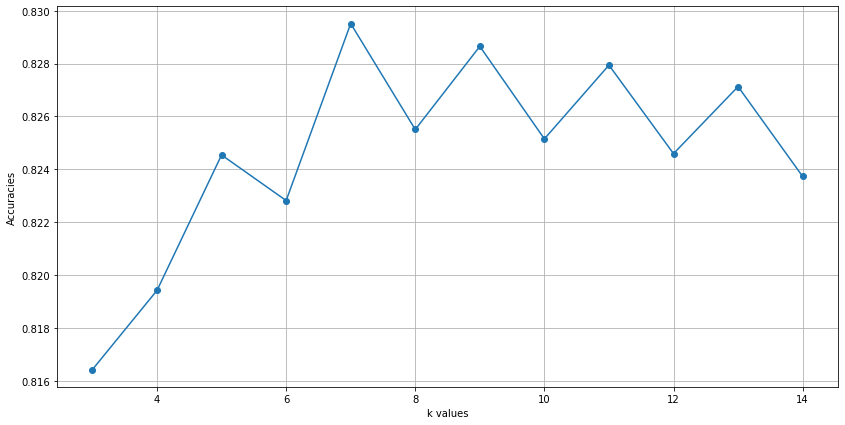

In [186]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [187]:
accuracy_score(y_test,y_pred_kNN)

0.8237264055206007

In [188]:
classifier=KNeighborsClassifier(n_neighbors=7)
kNN_model=classifier.fit(X_train,y_train)
y_pred_kNN=kNN_model.predict(X_test)

In [189]:
confusion_matrix(y_test,y_pred_kNN)

array([[14625,   675],
       [ 2685,  1723]], dtype=int64)

In [190]:
accuracy_score(y_test,y_pred_kNN)

0.8295108585346053

In [191]:
precision_score(y_test,y_pred_kNN)

0.7185154295246038

In [192]:
recall_score(y_test,y_pred_kNN)

0.3908802177858439

In [193]:
f1_score(y_test,y_pred_kNN)

0.5063179547458125

In [194]:
print('classification_report :\n',classification_report(y_test,y_pred_kNN))

classification_report :
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     15300
           1       0.72      0.39      0.51      4408

    accuracy                           0.83     19708
   macro avg       0.78      0.67      0.70     19708
weighted avg       0.82      0.83      0.81     19708



# Creating SVM(Kernel='Linear')Model

In [ ]:
accuracy_score(y_test,y_pred_svm)

# Creating SVM(Kernel='rbf')Model

In [ ]:
accuracy_score(y_test,y_pred_svm1)

# Creating DecisionTreeClassifier Model

In [195]:
X=df1.drop(['RainTomorrow'],axis=1)
y=df1['RainTomorrow']

In [196]:
# Splitting into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
dec_tree_model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred_tree=dec_tree_model.predict(X_test)

In [199]:
confusion_matrix(y_test,y_pred_tree)

array([[13086,  2214],
       [ 2127,  2281]], dtype=int64)

In [200]:
accuracy_score(y_test,y_pred_tree)

0.7797341181246195

In [201]:
precision_score(y_test,y_pred_tree)

0.5074527252502781

In [202]:
recall_score(y_test,y_pred_tree)

0.5174682395644283

In [203]:
f1_score(y_test,y_pred_tree)

0.5124115466696619

In [204]:
print('classification_report :\n',classification_report(y_test,y_pred_tree))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     15300
           1       0.51      0.52      0.51      4408

    accuracy                           0.78     19708
   macro avg       0.68      0.69      0.69     19708
weighted avg       0.78      0.78      0.78     19708



# Creating RandomForestClassifier Model

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rand_for_model=RandomForestClassifier().fit(X_train,y_train)
y_pred_rand=rand_for_model.predict(X_test)

In [207]:
confusion_matrix(y_test,y_pred_rand)

array([[14511,   789],
       [ 2207,  2201]], dtype=int64)

In [208]:
accuracy_score(y_test,y_pred_rand)

0.8479805155266896

In [209]:
precision_score(y_test,y_pred_rand)

0.7361204013377927

In [210]:
recall_score(y_test,y_pred_rand)

0.49931941923774953

In [211]:
f1_score(y_test,y_pred_rand)

0.5950256826169235

In [212]:
print('classification_report :\n',classification_report(y_test,y_pred_rand))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



# Creating GradientBoostingClassifier Model

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

In [214]:
grad_boost_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred_grad=grad_boost_model.predict(X_test)

In [215]:
confusion_matrix(y_test,y_pred_grad)

array([[14595,   705],
       [ 2321,  2087]], dtype=int64)

In [216]:
accuracy_score(y_test,y_pred_grad)

0.84645829104932

In [217]:
precision_score(y_test,y_pred_grad)

0.7474928366762178

In [218]:
recall_score(y_test,y_pred_grad)

0.4734573502722323

In [219]:
f1_score(y_test,y_pred_grad)

0.5797222222222222

In [220]:
print('classification_report :\n',classification_report(y_test,y_pred_grad))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.91     15300
           1       0.75      0.47      0.58      4408

    accuracy                           0.85     19708
   macro avg       0.81      0.71      0.74     19708
weighted avg       0.84      0.85      0.83     19708



# Creating Naive Bayes Classification Model

In [221]:
from sklearn.naive_bayes import GaussianNB

In [222]:
gaus_nb_model=GaussianNB().fit(X_train,y_train)
y_pred_gaus=gaus_nb_model.predict(X_test)

In [223]:
accuracy_score(y_test,y_pred_gaus)

0.8095189770651512

In [224]:
precision_score(y_test,y_pred_gaus)

0.5789473684210527

In [225]:
recall_score(y_test,y_pred_gaus)

0.544010889292196

In [226]:
f1_score(y_test,y_pred_gaus)

0.5609356725146198

In [227]:
# Fine Tuning RandomForestClassifier Model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [228]:
parameters={'n_estimators':[50,100,150,250],'max_depth':[3,6,9,None]}

In [230]:
cv=GridSearchCV(RandomForestClassifier(),parameters,scoring='f1')
cv.fit(X_train,y_train)
print(cv.best_params_)

{'max_depth': None, 'n_estimators': 250}


In [231]:
model_grid=RandomForestClassifier(n_estimators=250,max_depth=None)
model1=model_grid.fit(X_train,y_train)
y_pred_grid=model1.predict(X_test)

In [232]:
print('classification_report :\n',classification_report(y_test,y_pred_grid))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [233]:
accuracy_score(y_test,y_pred_grid)

0.8482849604221636

In [234]:
cv1=RandomizedSearchCV(RandomForestClassifier(),parameters,scoring='f1')
cv1.fit(X_train,y_train)
print(cv1.best_params_)

{'n_estimators': 250, 'max_depth': None}


In [235]:
model_random=RandomForestClassifier(n_estimators=250,max_depth=None)
model2=model_random.fit(X_train,y_train)
y_pred_random=model2.predict(X_test)

In [236]:
print('classification_report :\n',classification_report(y_test,y_pred_random))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [237]:
accuracy_score(y_test,y_pred_random)

0.8480819971585143